## 1. Breath alcohol tests in Ames, Iowa, USA
<p>Ames, Iowa, USA is the home of Iowa State University, a land grant university with over 36,000 students. By comparison, the city of Ames, Iowa, itself only has about 65,000 residents. As with any other college town, Ames has had its fair share of alcohol-related incidents. (For example, Google 'VEISHEA riots 2014'.) We will take a look at some breath alcohol test data from Ames that is published by the State of Iowa.</p>
<p><img style="width:500px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/usa.jpg"> </p>
<p>The data file 'breath_alcohol_ames.csv' contains 1,556 readings from breath alcohol tests administered by the Ames and Iowa State University Police Departments from January 2013 to December 2017. The columns in this data set are year, month, day, hour, location, gender, Res1, Res2.</p>

In [4]:
# import pandas
import pandas as pd
# ... YOUR CODE FOR TASK 1 ...

# read the data into your workspace
ba_data = pd.read_csv('datasets/breath_alcohol_ames.csv')

# quickly inspect the data
print(ba_data)

# obtain counts for each year 
ba_year = ba_data['year'].value_counts()
ba_year

      year  month  day  hour location gender   Res1   Res2
0     2017     12   17     1  Ames PD      M  0.046  0.046
1     2017     12   14     3   ISU PD      F  0.121  0.120
2     2017     12   10     5   ISU PD      F  0.068  0.067
3     2017     12   10     3   ISU PD      F  0.077  0.077
4     2017     12    9     2   ISU PD      M  0.085  0.084
5     2017     12    9     1  Ames PD      M  0.160  0.161
6     2017     12    7     3  Ames PD      M  0.131  0.131
7     2017     12    4     1   ISU PD      M  0.000  0.000
8     2017     12    3     1  Ames PD      M  0.091  0.090
9     2017     12    3     0  Ames PD      M  0.095  0.095
10    2017     12    2     1  Ames PD      M  0.155  0.155
11    2017     11   29     3   ISU PD      F  0.171  0.171
12    2017     11   21     3   ISU PD      F  0.050  0.051
13    2017     11   17    18   ISU PD      M  0.176  0.176
14    2017     11   11     3  Ames PD      M  0.072  0.072
15    2017     11   11     2   ISU PD      M  0.094  0.0

2013    397
2014    344
2015    286
2016    269
2017    260
Name: year, dtype: int64

## 2. What is the busiest police department in Ames?
<p>There are two police departments in the data set: the Iowa State University Police Department and the Ames Police Department. Which one administers more breathalyzer tests? </p>

In [5]:
# use value_counts to tally up the totals for each department
pds = ba_data['location'].value_counts()
pds

ISU PD     940
Ames PD    616
Name: location, dtype: int64

## 3. Nothing Good Happens after 2am
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/himym02.jpg" style="float: left;margin:5px 20px 5px 1px;width:300px"></p>
<p>We all know that "nothing good happens after 2am." Thus, there are inevitably some times of the day when breath alcohol tests, especially in a college town like Ames, are most and least common. Which hours of the day have the most and least breathalyzer tests?  </p>

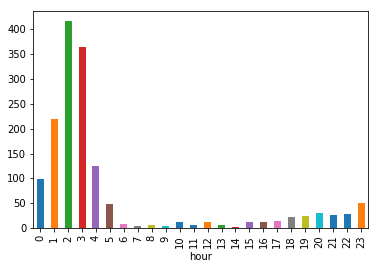

In [19]:
import matplotlib.pyplot as plt

# count by hour 
hourly = ba_data.groupby(['hour']).size()
#print(hourly)
# create a vertical bar graph of the arrest count by hour
hourly.plot.bar(x = 'hour')

## 4. Breathalyzer tests by month
<p>Now that we have discovered which time of day is most common for breath alcohol tests, we will determine which time of the year has the most breathalyzer tests. Which month will have the most recorded tests?</p>

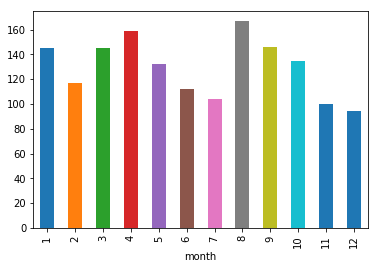

In [20]:
# count by month and arrange by descending frequency
monthly = ba_data.groupby(['month']).size()

# use plot.bar to make the appropriate bar chart
monthly.plot.bar(x='month')

## 5. COLLEGE
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/PF2081John-Belushi-College-Posters.jpg" style="float: left;margin:5px 20px 5px 1px"> </p>
<p>When we think of (binge) drinking in college towns in America, we usually think of something like this image at the left. And so, one might suspect that breath alcohol tests are given to men more often than women and that men drink more than women. </p>

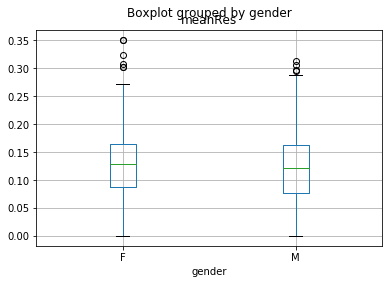

In [33]:
# count by gender
counts_gender = ba_data['gender'].value_counts()

# create a dataset with no NAs in gender 
gen = ba_data.dropna(subset=['gender'])

# create a mean test result variable
mean_bas = gen.assign(meanRes=(gen['Res1']+gen['Res2'])/2)

# # create side-by-side boxplots to compare the mean blood alcohol levels of men and women
mean_bas.boxplot(column = 'meanRes', by = 'gender')

## 6. Above the legal limit
<p>In the USA, it is illegal to drive with a blood alcohol concentration (BAC) above 0.08%. This is the case for <a href="https://www.dmv.org/automotive-law/dui.php">all 50 states</a>. Assuming everyone tested in our data was driving (though we have no way of knowing this from the data), if either of the results (<code>Res1</code>, <code>Res2</code>) are above 0.08, the person would be charged with DUI (driving under the influence). </p>

In [52]:
# Filter the data
duis = ba_data[(ba_data['Res1'] > 0.08) | (ba_data['Res2'] > 0.08)]

# proportion of tests that would have resulted in a DUI
p_dui = duis.shape[0]/ba_data.shape[0]
p_dui

0.7448586118251928

## 7. Breathalyzer tests: is there a pattern over time?
<p>We previously saw that 2am is the most common time of day for breathalyzer tests to be administered, and August is the most common month of the year for breathalyzer tests. Now, we look at the weeks in the year over time. </p>

In [54]:
# Create date variable
ba_data['date'] = pd.to_datetime(ba_data[['year', 'month', 'day']])

# Create a week variable
ba_data['week'] = ba_data['date'].dt.week

# Check your work
ba_data.head()

,year,month,day,hour,location,gender,Res1,Res2,date,week
0,2017,12,17,1,Ames PD,M,0.046,0.046,2017-12-17,50
1,2017,12,14,3,ISU PD,F,0.121,0.120,2017-12-14,50
2,2017,12,10,5,ISU PD,F,0.068,0.067,2017-12-10,49
3,2017,12,10,3,ISU PD,F,0.077,0.077,2017-12-10,49
4,2017,12,9,2,ISU PD,M,0.085,0.084,2017-12-09,49
5,2017,12,9,1,Ames PD,M,0.160,0.161,2017-12-09,49
6,2017,12,7,3,Ames PD,M,0.131,0.131,2017-12-07,49
7,2017,12,4,1,ISU PD,M,0.000,0.000,2017-12-04,49
8,2017,12,3,1,Ames PD,M,0.091,0.090,2017-12-03,48
9,2017,12,3,0,Ames PD,M,0.095,0.095,2017-12-03,48


## 8. Looking at timelines
<p>How do the weeks differ over time? One of the most common data visualizations is the time series, a line tracking the changes in a variable over time. We will use the new <code>week</code> variable to look at test frequency over time. We end with a time series plot showing the frequency of breathalyzer tests by week in year, with one line for each year. </p>

In [56]:
# choose and count the variables of interest  
timeline = ba_data.groupby(['week','year']).count()['Res1']

# unstack and plot
timeline.unstack().plot(title='VEISHEA DUIs', legend=True)

week  year
1     2013     6
      2014     5
      2015     5
      2016     6
      2017     5
2     2013    12
      2014     3
      2015     8
      2016     7
      2017     9
3     2013     8
      2014     4
      2015     5
      2016     4
      2017     7
4     2013     6
      2014    12
      2015     9
      2016     2
      2017    10
5     2013     5
      2014     9
      2015     5
      2016     4
      2017     2
6     2013     8
      2014     8
      2015     1
      2016     3
      2017     5
              ..
47    2013     5
      2014     7
      2015     6
      2016     3
      2017     1
48    2013     5
      2014     4
      2015     3
      2016     6
      2017     4
49    2013     9
      2014     7
      2015     5
      2016     3
      2017     6
50    2013     7
      2014     7
      2015     3
      2016     2
      2017     2
51    2013     5
      2014     6
      2015     1
      2016     1
52    2013     6
      2014     5
      2015     3
   

## 9. The end of VEISHEA
<p>From <a href="https://en.wikipedia.org/wiki/VEISHEA">Wikipedia</a>: 
"VEISHEA was an annual week-long celebration held each spring on the campus of Iowa State University in Ames, Iowa. The celebration featured an annual parade and many open-house demonstrations of the university facilities and departments. Campus organizations exhibited products, technologies, and held fundraisers for various charity groups. In addition, VEISHEA brought speakers, lecturers, and entertainers to Iowa State. [...] VEISHEA was the largest student-run festival in the nation, bringing in tens of thousands of visitors to the campus each year."</p>
<p>This over 90-year tradition in Ames was <a href="https://www.news.iastate.edu/news/2014/08/07/veisheaend">terminated permanently</a> after <a href="https://www.desmoinesregister.com/story/news/crime-and-courts/2014/04/09/veishea-ames-car-tipping/7495935/">riots in 2014</a>, where drunk celebrators flipped over multiple vehicles and tore light poles down. This was not the first incidence of violence and severe property damage in VEISHEA's history. Did former President Leath make the right decision by canceling VEISHEA?</p>

In [0]:
## Was it right to permanently cancel VEISHEA? TRUE or FALSE?
canceling_VEISHEA_was_right = True